In [2]:
!pip install tensorflow-gpu==2.1
!pip install hpbandster

     |████████████████████████████████| 421.8MB 28kB/s 
     |████████████████████████████████| 3.9MB 43.7MB/s 
     |████████████████████████████████| 450kB 44.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=fb9bf6c3c451d88a6d88aaf24a20c769fa2ad85769ce2797a3e7449f8b93a3ff
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Un

In [3]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [0]:
from google.colab import drive
import sys
import os

CLASS_BACK = '.'

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [5]:
import os
import gdown
FILE_PATH = 'TUH_feat.hdf5'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=1-VCuFpjiVEwtgE31te0Z7zdzEKs5HeLU', 
                './'+FILE_PATH, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-VCuFpjiVEwtgE31te0Z7zdzEKs5HeLU
To: /content/TUH_feat.hdf5
216MB [00:06, 33.8MB/s]


In [6]:
import h5py

f = h5py.File(FILE_PATH, 'r')
key_list = list(f.keys())
key_list

['00000675',
 '00001113',
 '00001413',
 '00001984',
 '00002448',
 '00002657',
 '00003053',
 '00003281',
 '00003306',
 '00003635']

In [7]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

train_list, test_list = train_test_split(key_list, test_size=TEST_SIZE, 
                                         random_state=RANDOM_STATE)
data_lists = {'train': train_list, 
              'test': test_list}

print(color.BOLD+color.UNDERLINE+'Training List'+color.END)
display(train_list)
print()
print(color.BOLD+color.UNDERLINE+'Test List'+color.END)
display(test_list)

Training List


['00002448',
 '00003635',
 '00001113',
 '00003053',
 '00003281',
 '00001984',
 '00000675',
 '00002657']


Test List


['00001413', '00003306']

In [8]:
import pandas as pd

def make_data(data_lists):
  data_dict = {}
  for data_type in data_lists:
    key_list = data_lists[data_type]
    for i, part_id in enumerate(key_list):
      if i == 0:
        data = pd.read_hdf(FILE_PATH, part_id)
      else:
        data = pd.concat([data, pd.read_hdf(FILE_PATH, part_id)])
    data_dict[data_type] = data
  return data_dict
    
data_dict = make_data(data_lists)

X_train = data_dict['train'].values
X_test = data_dict['test'].values
y_train = data_dict['train'].index.values
y_test = data_dict['test'].index.values
feat_names = list(data_dict['train'].columns)

display(X_train.shape)
display(X_test.shape)

(15566, 1298)

(5050, 1298)

In [9]:
import numpy as np
from sklearn import preprocessing
display(np.unique(y_train))

# lets change integers
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

display(np.unique(y_train))

array([ 6, 12])

array([0, 1])

In [10]:
#Perceptrons
%%time
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

per_clf = Perceptron(max_iter=100, #tol=-np.infty, 
                     random_state=RANDOM_STATE)

scores = cross_val_score(estimator=per_clf, 
                         X=X_train, 
                         y=y_train, 
                         scoring = 'accuracy',
                         cv=5,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.98715478 0.98329586 0.96562801 0.97494378 0.97012528]
CV accuracy: 0.976 +/- 0.008
CPU times: user 91.3 ms, sys: 341 ms, total: 432 ms
Wall time: 4.26 s


In [11]:
%%time
from sklearn.neural_network import MLPClassifier

per_clf = MLPClassifier(
    hidden_layer_sizes = (100,),
    max_iter=100,
    early_stopping = True, 
    random_state=RANDOM_STATE)

scores = cross_val_score(estimator=per_clf, 
                         X=X_train, 
                         y=y_train, 
                         scoring = 'accuracy',
                         cv=5,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CV accuracy scores: [0.9894027  0.99004176 0.98490202 0.98875683 0.97558625]
CV accuracy: 0.986 +/- 0.005
CPU times: user 66.9 ms, sys: 91.8 ms, total: 159 ms
Wall time: 32.4 s


In [12]:
#Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=300,
                input_dim=X_train.shape[1],
                activation='tanh'))

model.add(Dense(units=100,
                activation='tanh'))

model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               389700    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 419,901
Trainable params: 419,901
Non-trainable params: 0
_________________________________________________________________


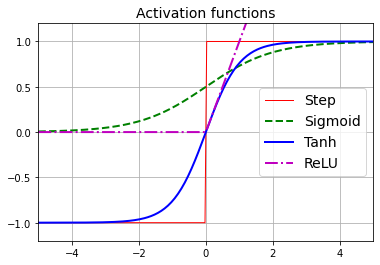

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure()

plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.show()

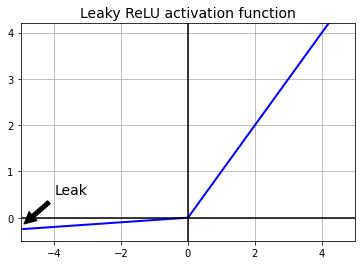

In [14]:
# for leaky_relu
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

z = np.linspace(-5, 5, 200)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

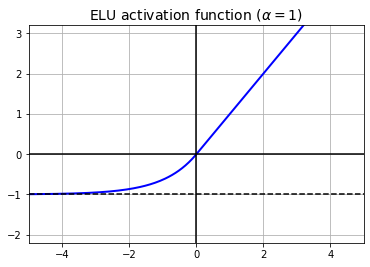

In [15]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

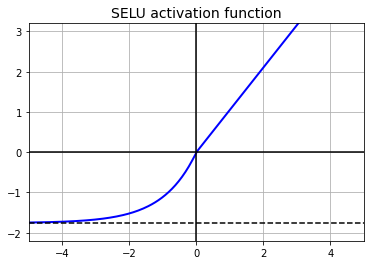

In [16]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [0]:
loss = 'binary_crossentropy'
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.001),
              loss=loss,
              metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

In [20]:
from tensorflow.keras.backend import clear_session

# Returns a short sequential model
def create_model():
  model = Sequential()

  model.add(Dense(units=300,
                  input_dim=X_train.shape[1],
                  activation='relu'))

  model.add(Dense(units=100,
                  activation='relu'))

  model.add(Dense(units=1,
                  activation='sigmoid'))

  model.compile(optimizer=Adam(0.001),
                loss=loss,
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

  return model

clear_session()
# Create a basic model instance
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               389700    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 419,901
Trainable params: 419,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_filepath = "Best_MLP_Model.ckpt"

# Save the model under certain conditions
callback_checkpoint = ModelCheckpoint(filepath=best_model_filepath,
                                      monitor='val_loss',
                                      verbose=0,
                                      save_weights_only=True,
                                      save_best_only=True)

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, 
                                        verbose=1)

In [0]:
from tensorflow.python.keras.callbacks import TensorBoard

tensorboard_logs_filepath = "./MLP_logs/"

callback_tensorboard = TensorBoard(log_dir=tensorboard_logs_filepath,
                                   histogram_freq=0,
                                   write_graph=False)

In [0]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [0]:
def create_callbacks(best_model_filepath, tensorboard_logs_filepath):

  callback_checkpoint = ModelCheckpoint(filepath=best_model_filepath,
                                        monitor='val_loss',
                                        verbose=0,
                                        save_weights_only=True,
                                        save_best_only=True)
  
  callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, 
                                        verbose=1)
  
  callback_tensorboard = TensorBoard(log_dir=tensorboard_logs_filepath,
                                   histogram_freq=0,
                                   write_graph=False)
  
  callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)
  
  return [callback_checkpoint, callback_early_stopping,
          callback_tensorboard, callback_reduce_lr]

In [0]:
#TRAIN MODEL
from sklearn.utils import class_weight
# calculate the class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y_train),
                                                  y_train)

In [28]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(X_train, 
                    y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS,
                    validation_split=0.1,
                    callbacks= create_callbacks(best_model_filepath, 
                                                tensorboard_logs_filepath),
                    class_weight = class_weights,
                    verbose=1)

Train on 14009 samples, validate on 1557 samples
Epoch 1/20
14009/14009 [==============================] - 3s 203us/sample - loss: 0.0453 - accuracy: 0.9852 - AUC: 0.9756 - Recall: 0.8382 - Precision: 0.8248 - val_loss: 0.0444 - val_accuracy: 0.9846 - val_AUC: 0.9978 - val_Recall: 0.9608 - val_Precision: 0.6901
Epoch 2/20
14009/14009 [==============================] - 2s 111us/sample - loss: 0.0162 - accuracy: 0.9940 - AUC: 0.9975 - Recall: 0.9150 - Precision: 0.9459 - val_loss: 0.0256 - val_accuracy: 0.9884 - val_AUC: 0.9779 - val_Recall: 0.7843 - val_Precision: 0.8511
Epoch 3/20
13760/14009 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9965 - AUC: 0.9997 - Recall: 0.9570 - Precision: 0.9633
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
14009/14009 [==============================] - 2s 109us/sample - loss: 0.0090 - accuracy: 0.9964 - AUC: 0.9997 - Recall: 0.9542 - Precision: 0.9621 - val_loss: 0.0329 - val_accuracy: 0.9904 -

In [29]:
#Evaluate Model
list(history.history.keys())

['loss',
 'accuracy',
 'AUC',
 'Recall',
 'Precision',
 'val_loss',
 'val_accuracy',
 'val_AUC',
 'val_Recall',
 'val_Precision',
 'lr']

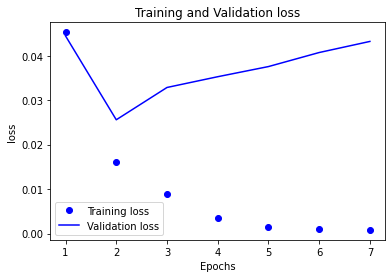

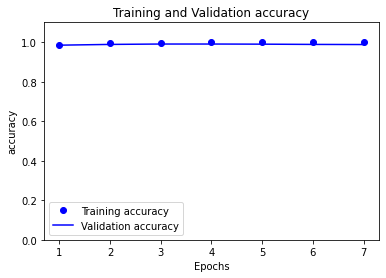

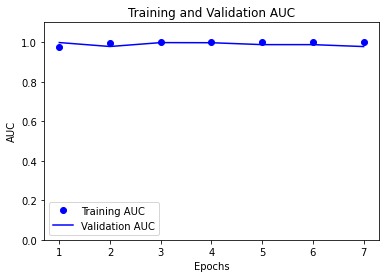

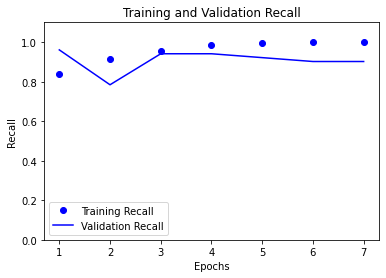

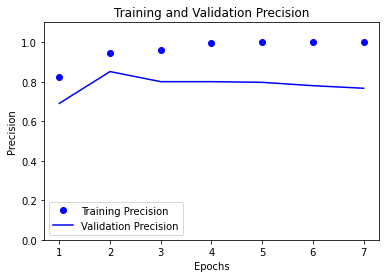

In [30]:
import matplotlib.pyplot as plt

def plot_progress(history_dict):
  for key in list(history_dict.keys())[:5]:
    plt.clf() # Clears the figure
    training_values = history_dict[key] 
    val_values = history_dict['val_'+key]

    epochs = range(1, len(training_values) + 1)

    plt.plot(epochs, training_values, 'bo', label='Training '+key)

    plt.plot(epochs, val_values, 'b', label='Validation '+key)

    if key != 'loss':
      plt.ylim([0.,1.1])

    plt.title('Training and Validation '+key) 
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend()
    plt.show()
    
plot_progress(history.history)

In [31]:
clear_session()

model = create_model()
model.load_weights(best_model_filepath)
metrics = model.evaluate(X_test, y_test)

pd.DataFrame(metrics, index = model.metrics_names)

5050/5050 [==============================] - 1s 139us/sample - loss: 0.0064 - accuracy: 0.9984 - AUC: 0.9952 - Recall: 0.9558 - Precision: 0.9730


,0
loss,0.006421
accuracy,0.998416
AUC,0.995236
Recall,0.955752
Precision,0.972973
